<a href="https://colab.research.google.com/github/meriemdhouibi13/physicsproject/blob/main/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import importlib.metadata

packages = ["pandas", "numpy", "matplotlib", "seaborn"]
package_info = {pkg: importlib.metadata.version(pkg) for pkg in packages}

print(package_info)

{'pandas': '2.2.2', 'numpy': '2.0.2', 'matplotlib': '3.10.0', 'seaborn': '0.13.2'}


In [7]:
!pip install nycflights13

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 49.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for nycflights13: filename=nycflights13-0.0.3-py3-none-any.whl size=8732722 sha256=709325fd854ea1b2434b575c883fc7a6dd8ed365b6cbd470fc657375664ecdb2
  Stored in directory: /root/.cache/pip/wheels/88/f8/a0/0cddecda19243434a89128b8fd0b4d58ce5747261751428873
Successfully built nycflights13


In [8]:
from nycflights13 import flights

print(flights.head())
print(flights.columns)
print(flights.info())


   year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
0  2013      1    1     517.0             515        2.0     830.0   
1  2013      1    1     533.0             529        4.0     850.0   
2  2013      1    1     542.0             540        2.0     923.0   
3  2013      1    1     544.0             545       -1.0    1004.0   
4  2013      1    1     554.0             600       -6.0     812.0   

   sched_arr_time  arr_delay carrier  flight tailnum origin dest  air_time  \
0             819       11.0      UA    1545  N14228    EWR  IAH     227.0   
1             830       20.0      UA    1714  N24211    LGA  IAH     227.0   
2             850       33.0      AA    1141  N619AA    JFK  MIA     160.0   
3            1022      -18.0      B6     725  N804JB    JFK  BQN     183.0   
4             837      -25.0      DL     461  N668DN    LGA  ATL     116.0   

   distance  hour  minute             time_hour  
0      1400     5      15  2013-01-01T10:00:00Z  
1      141

/usr/local/lib/python3.11/dist-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 2923'. Pick better value with 'binwidth'.
/usr/local/lib/python3.11/dist-packages/plotnine/layer.py:284: PlotnineWarning: stat_bin : Removed 8255 rows containing non-finite values.


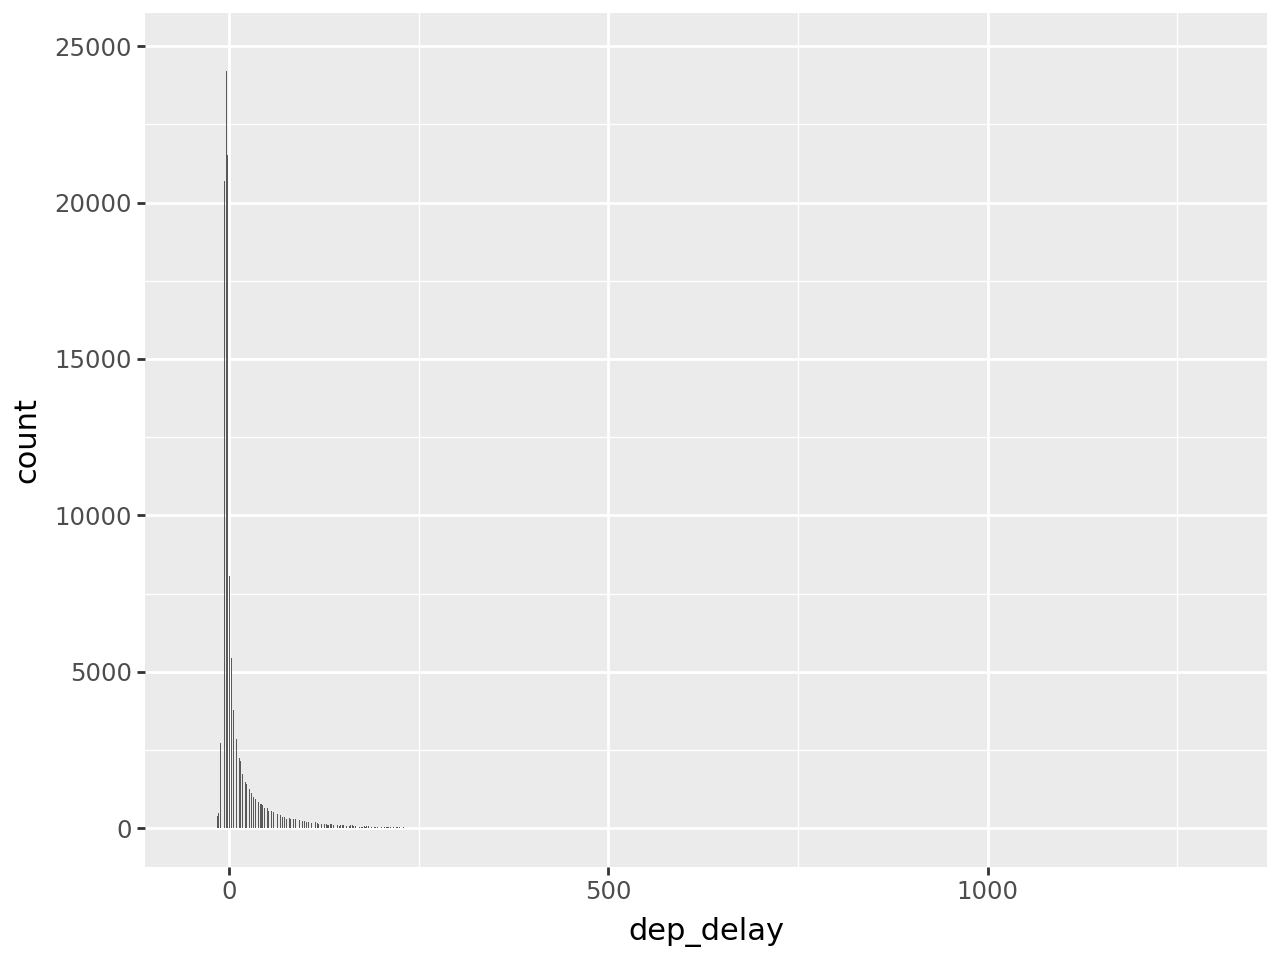

In [10]:
from plotnine import ggplot, aes, geom_histogram

# Create the histogram
(ggplot(flights, aes(x="dep_delay")) +
        geom_histogram())


/usr/local/lib/python3.11/dist-packages/plotnine/layer.py:284: PlotnineWarning: stat_bin : Removed 8255 rows containing non-finite values.


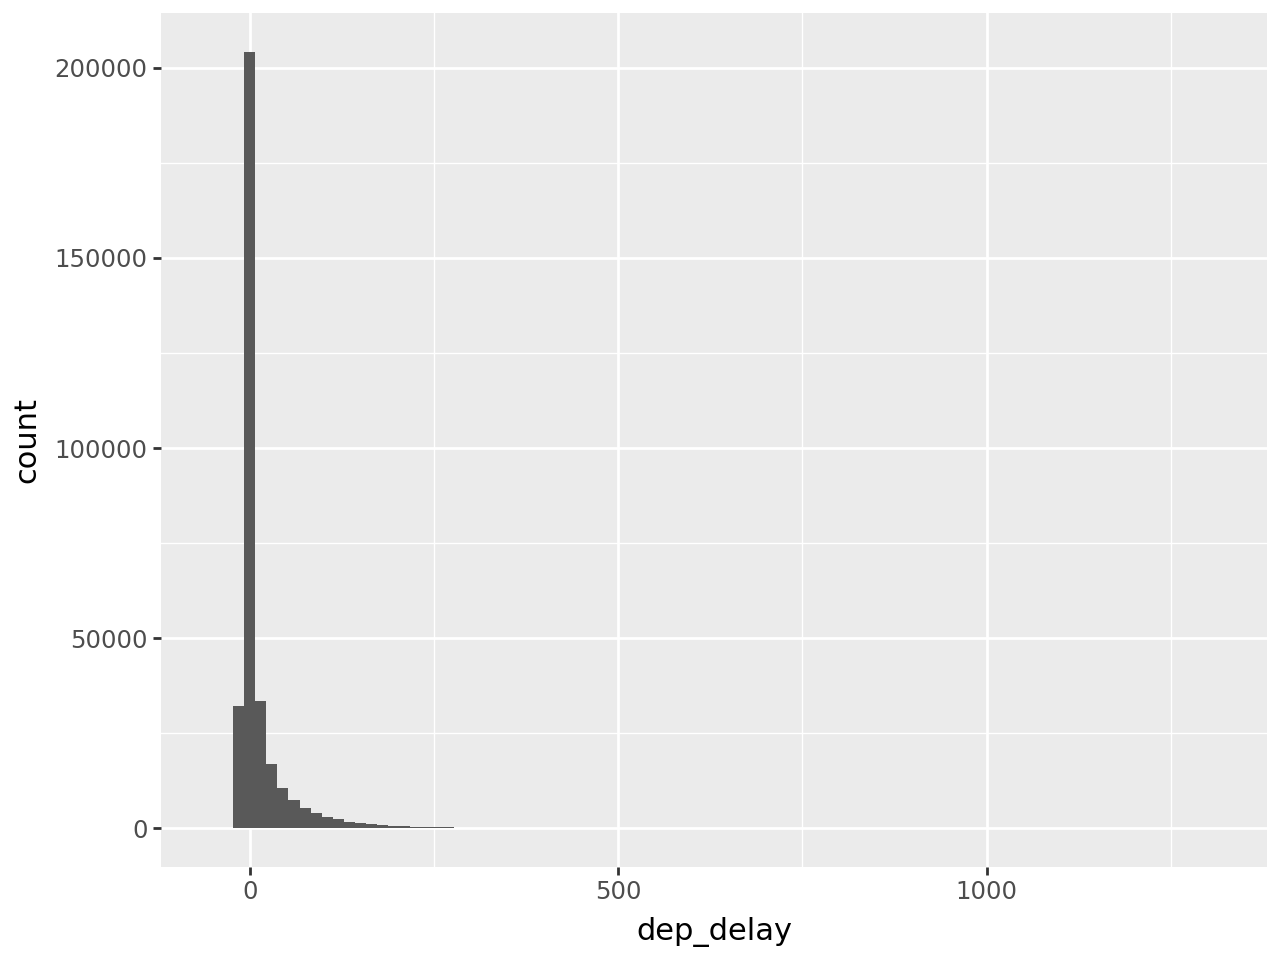

In [11]:
(ggplot(flights, aes(x="dep_delay")) +
        geom_histogram(binwidth=15))

/usr/local/lib/python3.11/dist-packages/plotnine/layer.py:284: PlotnineWarning: stat_bin : Removed 8255 rows containing non-finite values.


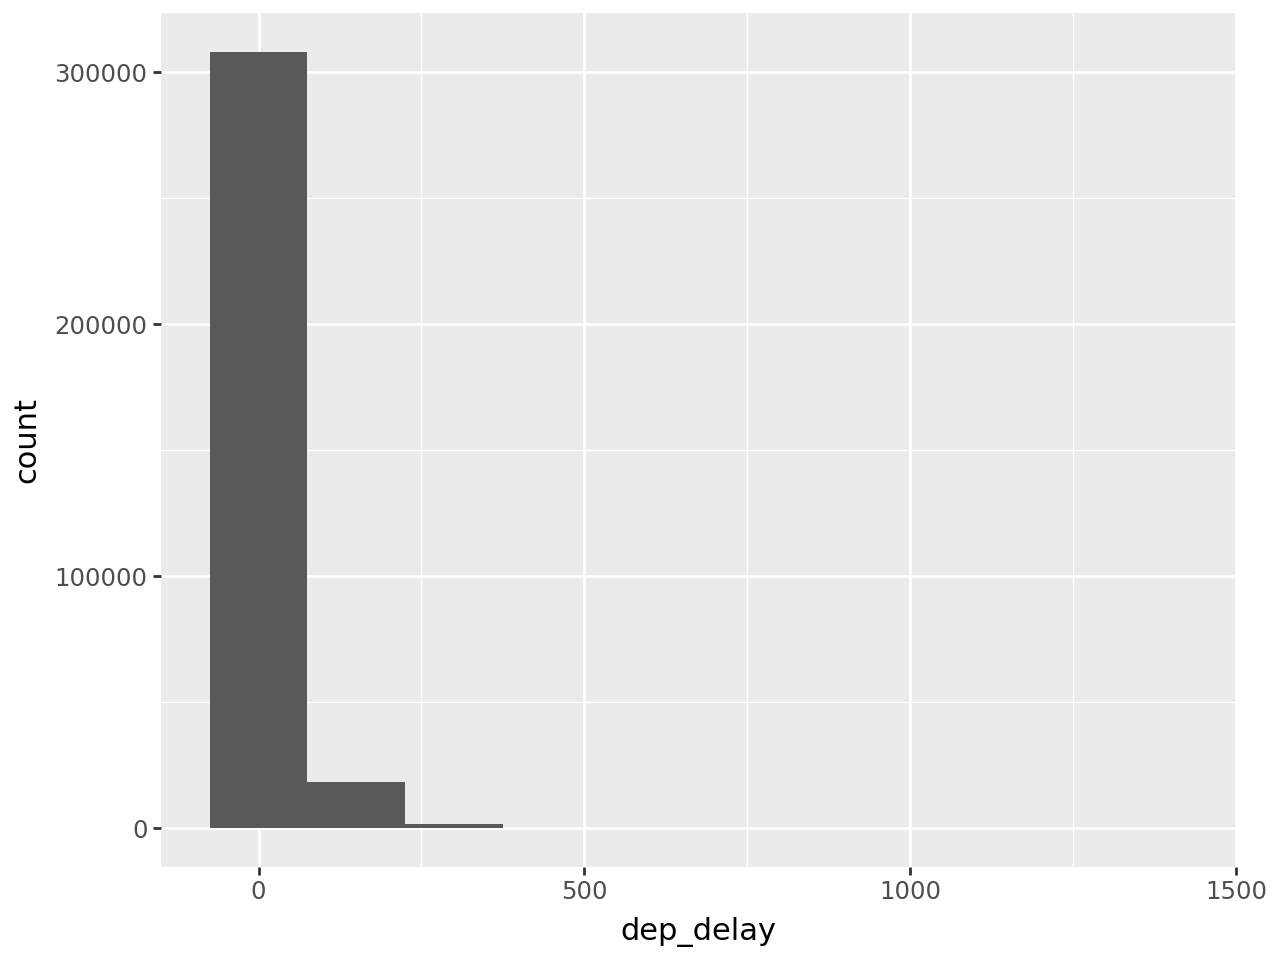

In [12]:
(ggplot(flights, aes(x="dep_delay")) +
        geom_histogram(binwidth=150))


/usr/local/lib/python3.11/dist-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 939'. Pick better value with 'binwidth'.
/usr/local/lib/python3.11/dist-packages/plotnine/layer.py:284: PlotnineWarning: stat_bin : Removed 98 rows containing non-finite values.


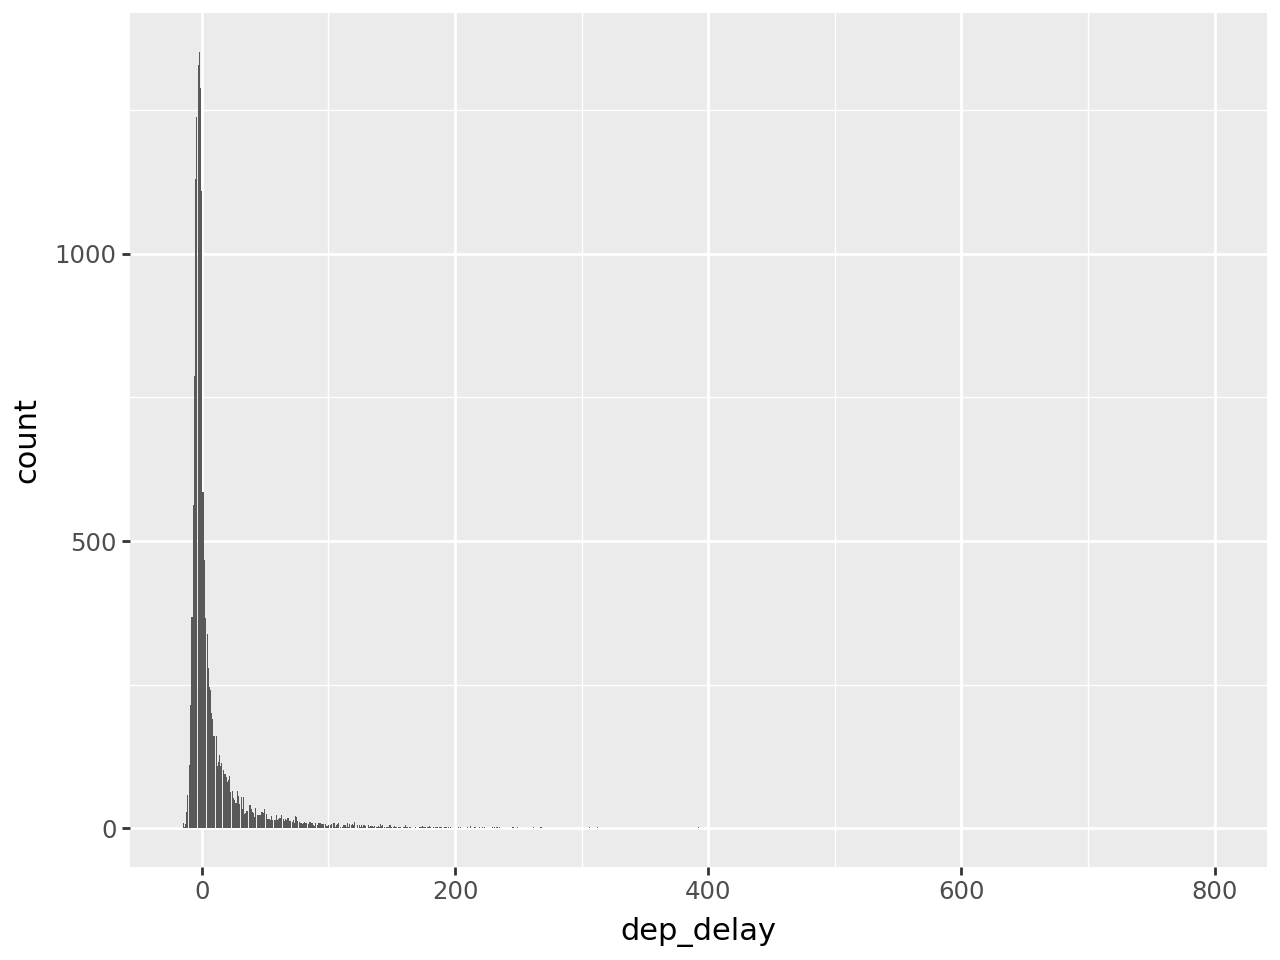

In [14]:
lax_flights = flights[flights["dest"] == "LAX"]
(ggplot(lax_flights, aes(x="dep_delay")) +
        geom_histogram())

In [15]:
lax_flights["dep_delay"].agg(["mean", "median", "count"])

,dep_delay
mean,9.401344
median,-1.000000
count,16076.000000


In [16]:
sfo_feb_flights = flights[(flights["dest"] == "SFO") & (flights["month"] == 2)]

# Display the first few rows
print(sfo_feb_flights.head())

        year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
111316  2013      2    1     559.0             600       -1.0     923.0   
111348  2013      2    1     631.0             635       -4.0     946.0   
111370  2013      2    1     653.0             700       -7.0    1023.0   
111387  2013      2    1     704.0             715      -11.0    1040.0   
111402  2013      2    1     723.0             730       -7.0    1055.0   

        sched_arr_time  arr_delay carrier  flight tailnum origin dest  \
111316             925       -2.0      UA     303  N508UA    JFK  SFO   
111348            1002      -16.0      UA     421  N818UA    EWR  SFO   
111370            1045      -22.0      DL    1865  N713TW    JFK  SFO   
111387            1040        0.0      UA     799  N557UA    JFK  SFO   
111402            1115      -20.0      VX      11  N839VA    JFK  SFO   

        air_time  distance  hour  minute             time_hour  
111316     358.0      2586     6       0  201

In [18]:
sfo_feb_flights = flights[(flights["dest"] == "SFO") & (flights["month"] == 2)]


# Filter flights with destination SFO in February

sfo_feb_flights = flights[(flights["dest"] == "SFO") & (flights["month"] == 2)]


In [19]:
import numpy as np

# Group by origin and compute summary statistics
summary = sfo_feb_flights.groupby("origin").agg(
    median_dd=("dep_delay", "median"),
    iqr_dd=("dep_delay", lambda x: np.percentile(x, 75) - np.percentile(x, 25)),  # IQR calculation
    n_flights=("dep_delay", "count")
)

print(summary)

        median_dd  iqr_dd  n_flights
origin                              
EWR           0.0     NaN        188
JFK          -2.0     NaN        574
